# CS 210 PROJECT

### Data Source

In [52]:
import pandas as pd
import csv  # Import the csv module

# Specify the file path and drop unused columns
file_path = 'goodreads_library_export_def.csv'
data = pd.read_csv(file_path)
columns_to_drop = ['ISBN', 'ISBN13','Bookshelves','Bookshelves with positions','Date Added','Spoiler','Private Notes','My Review']
data = data.drop(columns=columns_to_drop)
data.head()

,Book Id,Title,Author,Author l-f,Additional Authors,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Exclusive Shelf,Read Count,Owned Copies
0,34227949,Bir Çöküşün Öyküsü,Stefan Zweig,"Zweig, Stefan",Regaip Minareci,3,3.92,Türkiye İş Bankası Kültür Yayınları,Paperback,56.0,2017.0,1910.0,2023/08/06,read,1,0
1,13420674,"Bir Delinin Anı Defteri, Palto-Burun, Petersbu...",Nikolai Gogol,"Gogol, Nikolai",Mazlum Beyhan,5,4.25,Türkiye İş Bankası Kültür Yayınları,Paperback,223.0,2006.0,1835.0,2023/06/02,read,1,0
2,12008285,On Küçük Zenci,Agatha Christie,"Christie, Agatha",Semih Yazıcıoğlu,5,4.28,Altın Kitaplar,Paperback,191.0,2008.0,1939.0,2018/06/02,read,1,0
3,41462636,Böyle Söyledi Zerdüst - Hasan Ali Yücel Klasik...,Friedrich Nietzsche,"Nietzsche, Friedrich",NaN,4,4.07,Is Bankasi Kültür Yayinlari,Paperback,NaN,2015.0,1883.0,2022/03/02,read,1,0
4,7126,The Count of Monte Cristo,Alexandre Dumas,"Dumas, Alexandre",Robin Buss,4,4.30,Penguin Classics,Paperback,1276.0,2003.0,1844.0,2022/11/20,read,1,0


# Exploratory Data Analysis

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Book Id                    71 non-null     int64  
 1   Title                      71 non-null     object 
 2   Author                     71 non-null     object 
 3   Author l-f                 71 non-null     object 
 4   Additional Authors         48 non-null     object 
 5   My Rating                  71 non-null     int64  
 6   Average Rating             71 non-null     float64
 7   Publisher                  71 non-null     object 
 8   Binding                    69 non-null     object 
 9   Number of Pages            69 non-null     float64
 10  Year Published             70 non-null     float64
 11  Original Publication Year  69 non-null     float64
 12  Date Read                  71 non-null     object 
 13  Exclusive Shelf            71 non-null     object 
 

In [54]:
data.describe()

,Book Id,My Rating,Average Rating,Number of Pages,Year Published,Original Publication Year,Read Count,Owned Copies
count,7.100000e+01,71.000000,71.000000,69.000000,70.000000,69.000000,71.0,71.0
mean,2.163864e+07,3.901408,4.034225,230.333333,1979.642857,1772.521739,1.0,0.0
std,1.899044e+07,0.912687,0.281672,227.612459,237.773247,494.892966,0.0,0.0
min,5.297000e+03,2.000000,3.400000,45.000000,21.000000,-400.000000,1.0,0.0
25%,8.254696e+06,3.000000,3.910000,96.000000,2004.000000,1860.000000,1.0,0.0
50%,1.780190e+07,4.000000,4.030000,155.000000,2011.500000,1897.000000,1.0,0.0
75%,3.453914e+07,5.000000,4.265000,261.000000,2016.000000,1943.000000,1.0,0.0
max,1.075886e+08,5.000000,4.560000,1276.000000,2022.000000,1999.000000,1.0,0.0


In [55]:
author_counts = data.groupby('Author')['Title'].nunique()

# Find the author with the maximum count (most read)
most_read_author = author_counts.idxmax()

# Display the most read author
print(f"The most read author is: {most_read_author}")

The most read author is: Fyodor Dostoevsky


In [56]:
data['Date Read'] = pd.to_datetime(data['Date Read'])

# Extract the year from the 'Date Read' column
data['Year Read'] = data['Date Read'].dt.year

# Count the number of books read in each year
books_per_year = data['Year Read'].value_counts().sort_index()
books_per_year

Year Read
2016     7
2017     6
2018     9
2019     9
2020    15
2021     6
2022    11
2023     8
Name: count, dtype: int64

In [57]:
# Convert the 'Date Read' column to datetime format
data['Date Read'] = pd.to_datetime(data['Date Read'], errors='coerce')

# Drop rows with missing or NaT (Not a Time) values
data = data.dropna(subset=['Date Read'])

# Extract the month from the 'Date Read' column
data['Month'] = data['Date Read'].dt.strftime('%m').astype(int)

# Count the number of books read in each month
books_per_month = data['Month'].value_counts().sort_index(ascending=True)
books_per_month

Month
1      2
2      5
3      6
4      5
5      6
6     11
7     11
8     11
9      5
10     1
11     5
12     3
Name: count, dtype: int64

In [58]:

# Assuming 'Date Read' is the column containing the date information
# Assuming each row represents a book read, and you want to count the number of books read per season for each year

# Convert 'Date Read' to datetime type
data['Date Read'] = pd.to_datetime(data['Date Read'])

# Extract the year and month from the 'Date Read' column
data['Year'] = data['Date Read'].dt.year
data['Month'] = data['Date Read'].dt.month

# Map months to seasons
season_mapping = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Fall', 10: 'Fall', 11: 'Fall'}

data['Season'] = data['Month'].map(season_mapping)

# Group by year and season, and count the number of books read
seasonal_counts = data.groupby(['Year', 'Season']).size().unstack()
seasonal_counts

Season,Fall,Spring,Summer,Winter
Year,,,,
2016,NaN,1.0,4.0,2.0
2017,NaN,NaN,6.0,NaN
2018,NaN,3.0,4.0,2.0
2019,1.0,2.0,5.0,1.0
2020,2.0,7.0,4.0,2.0
2021,3.0,NaN,2.0,1.0
2022,3.0,3.0,4.0,1.0
2023,2.0,1.0,4.0,1.0


In [59]:

# Convert 'Date Read' to datetime type
data['Date Read'] = pd.to_datetime(data['Date Read'])

# Extract the year and month from the 'Date Read' column
data['Year'] = data['Date Read'].dt.year
data['Month'] = data['Date Read'].dt.month

# Map months to seasons
season_mapping = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Fall', 10: 'Fall', 11: 'Fall'}

data['Season'] = data['Month'].map(season_mapping)

# Group by year and season, and count the number of books read
seasonal_counts = data.groupby(['Year', 'Season']).size().unstack()

# Calculate the average book reading per year
average_per_year = data.groupby('Year').size().mean()

# Add a row for average book reading per year
seasonal_counts.loc['Average'] = average_per_year
print("Average Books Per Year")
average_per_year

Average Books Per Year


8.875

In [60]:
# Convert 'Date Read' to datetime type
data['Date Read'] = pd.to_datetime(data['Date Read'])

# Extract the month from the 'Date Read' column
data['Month'] = data['Date Read'].dt.month

# Map months to seasons
season_mapping = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Fall', 10: 'Fall', 11: 'Fall'}

data['Season'] = data['Month'].map(season_mapping)

# Group by season and count the number of books read
seasonal_counts = data.groupby('Season').size()
print("Seasonal Distribution of Books Counts")
seasonal_counts

Seasonal Distribution of Books Counts


Season
Fall      11
Spring    17
Summer    33
Winter    10
dtype: int64

In [61]:
data['Date Read'] = pd.to_datetime(data['Date Read'])
data['Year'] = data['Date Read'].dt.year
data['Month'] = data['Date Read'].dt.month

season_mapping = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Fall', 10: 'Fall', 11: 'Fall'}
data['Season'] = data['Month'].map(season_mapping)

# Now, let's calculate the distribution of ratings across seasons
seasonal_rating_distribution = data.groupby(['Season', 'My Rating']).size().unstack(fill_value=0)
seasonal_rating_distribution

My Rating,2,3,4,5
Season,,,,
Fall,0,5,3,3
Spring,2,3,8,4
Summer,2,9,9,13
Winter,0,4,4,2


In [62]:
# Convert 'Date Read' to datetime and extract year and month
data['Date Read'] = pd.to_datetime(data['Date Read'])
data['Year'] = data['Date Read'].dt.year
data['Month'] = data['Date Read'].dt.month

# Define a mapping from months to seasons
season_mapping = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Fall', 10: 'Fall', 11: 'Fall'}
data['Season'] = data['Month'].map(season_mapping)

# Group by season and author
season_author_group = data.groupby(['Season', 'Author']).size().unstack(fill_value=0)
season_author_group

Author,Agatha Christie,Albert Camus,Alexandre Dumas,Anthony Burgess,Antoine de Saint-Exupéry,Anton Chekhov,Arthur Schopenhauer,Chuck Palahniuk,Erasmus,Franz Kafka,...,Stefan Zweig,Sun Tzu,Theodore Dreiser,Victor Hugo,William Golding,William Shakespeare,Yakup Kadri Karaosmanoğlu,Yaşar Kemal,Yusuf Atılgan,İbrahim Şinasi
Season,,,,,,,,,,,,,,,,,,,,,
Fall,0,0,1,0,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,0,0
Spring,0,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
Summer,1,0,0,1,0,1,1,1,0,1,...,4,0,0,1,0,0,1,1,0,0
Winter,0,0,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,2,1


In [63]:
# Convert 'Date Read' to datetime format and extract the season
data['Date Read'] = pd.to_datetime(data['Date Read'])
season_mapping = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Fall', 10: 'Fall', 11: 'Fall'}
data['Season'] = data['Date Read'].dt.month.map(season_mapping)

# Group by season and author, then count the number of books
seasonal_author_counts = data.groupby(['Season', 'Author']).size()

# Find the most read author for each season
most_read_authors_per_season = seasonal_author_counts.groupby(level=0).idxmax()

# Display the most read authors in each season
print("Most Read Authors per Season:")
print(most_read_authors_per_season)

Most Read Authors per Season:
Season
Fall        (Fall, George Orwell)
Spring     (Spring, Albert Camus)
Summer     (Summer, Stefan Zweig)
Winter    (Winter, Yusuf Atılgan)
dtype: object


In [64]:
# Convert 'Date Read' to datetime format and extract the season
data['Date Read'] = pd.to_datetime(data['Date Read'])
season_mapping = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Fall', 10: 'Fall', 11: 'Fall'}
data['Season'] = data['Date Read'].dt.month.map(season_mapping)

# Group by season and author, then count the number of books
seasonal_author_counts = data.groupby(['Season', 'Author']).size()

# Find the most read author for each season
most_read_authors_per_season = seasonal_author_counts.groupby(level=0).idxmax()

# Extract the count of books read for the most read authors in each season
most_read_counts_per_season = seasonal_author_counts.loc[most_read_authors_per_season]

# Display the results
print("Most Read Authors and Book Counts per Season:")
for season_author, count in most_read_counts_per_season.items():
    print(f"{season_author[0]}: Author - {season_author[1]}, Books Read - {count}")


Most Read Authors and Book Counts per Season:
Fall: Author - George Orwell, Books Read - 2
Spring: Author - Albert Camus, Books Read - 1
Summer: Author - Stefan Zweig, Books Read - 4
Winter: Author - Yusuf Atılgan, Books Read - 2


In [65]:
# Calculate the mean number of pages for each season
seasonal_average_pages = data.groupby('Season')['Number of Pages'].mean()

# Find the season with the highest average
season_with_most_pages = seasonal_average_pages.idxmax()
max_pages = seasonal_average_pages.max()

print(f"The season in which I tend to read books with more pages is {season_with_most_pages} (average pages: {max_pages:.2f}).")
print("\nAverage number of pages per book in each season:")
print(seasonal_average_pages)



The season in which I tend to read books with more pages is Fall (average pages: 405.82).

Average number of pages per book in each season:
Season
Fall      405.818182
Spring    163.937500
Summer    232.500000
Winter    136.600000
Name: Number of Pages, dtype: float64


# Data Visualization

In [66]:
#add useful libraries for visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

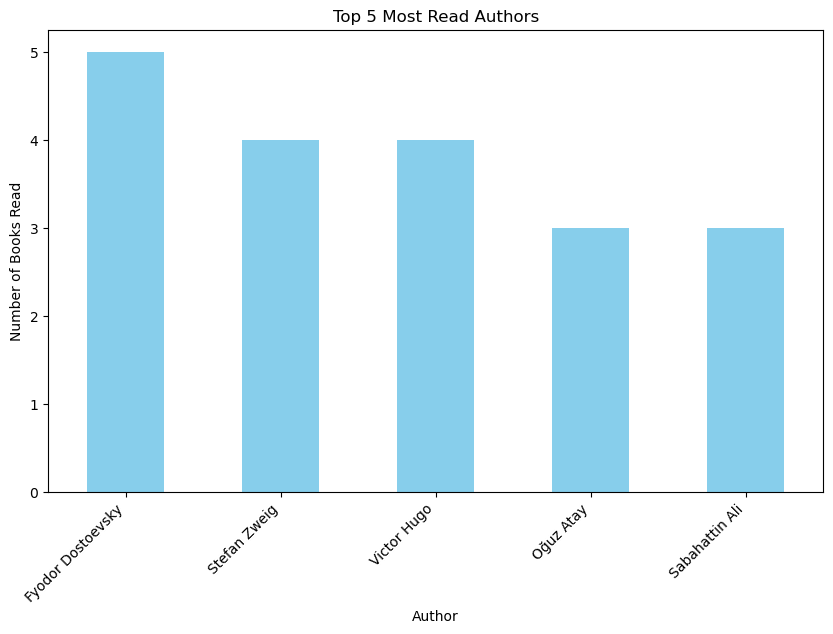

In [67]:
# Group the data by 'Author' and count the number of unique titles for each author
author_counts = data.groupby('Author')['Title'].nunique()

# Select the top 5 most read authors
top_authors = author_counts.nlargest(5)

# Plot a bar chart to visualize the most read authors
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Read Authors')
plt.xlabel('Author')
plt.ylabel('Number of Books Read')
plt.xticks(rotation=45, ha='right')
plt.show()

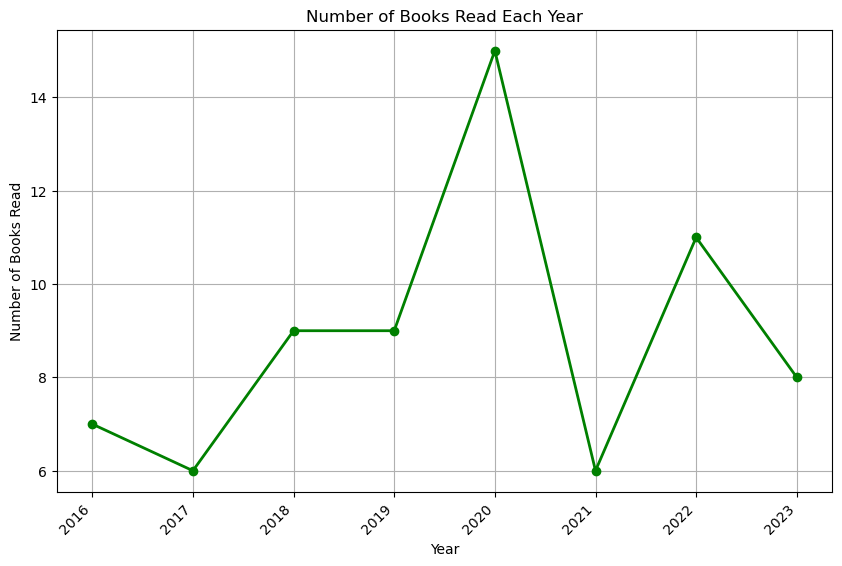

In [68]:
# Plot a line chart to visualize the number of books read each year
plt.figure(figsize=(10, 6))
plt.plot(books_per_year.index, books_per_year.values, marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Number of Books Read Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Books Read')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

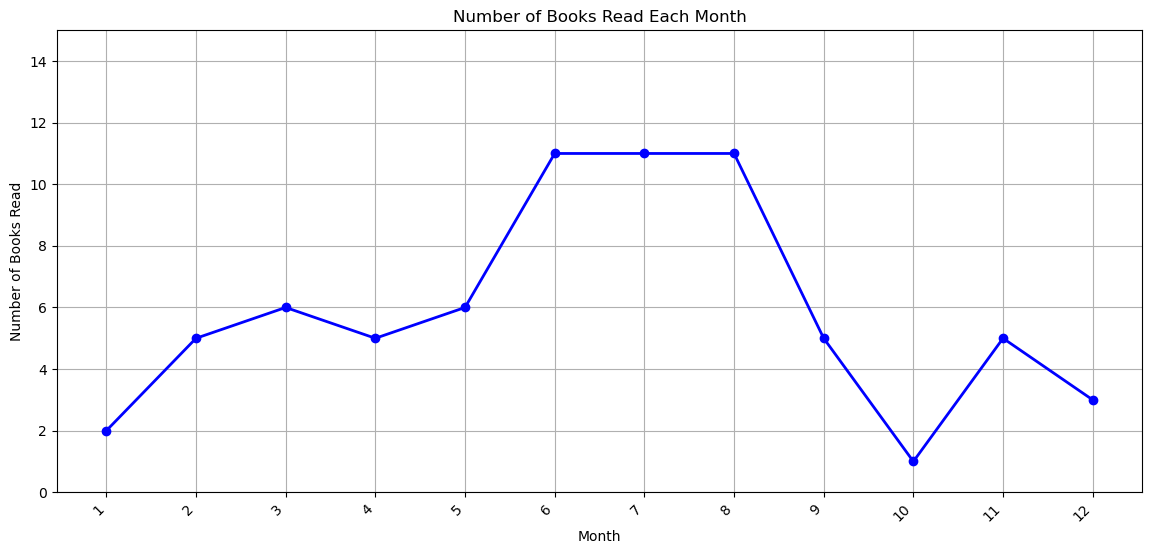

In [69]:
# Plot a line chart to visualize the number of books read each month
plt.figure(figsize=(14, 6))
plt.plot(books_per_month.index, books_per_month.values, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Number of Books Read Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Books Read')
plt.xticks(range(1, 13), rotation=45, ha='right')  # Set x-axis ticks from 1 to 12
plt.grid(True)
plt.ylim(0, 15)  # Set the y-axis limit from 0 to 40
plt.show()



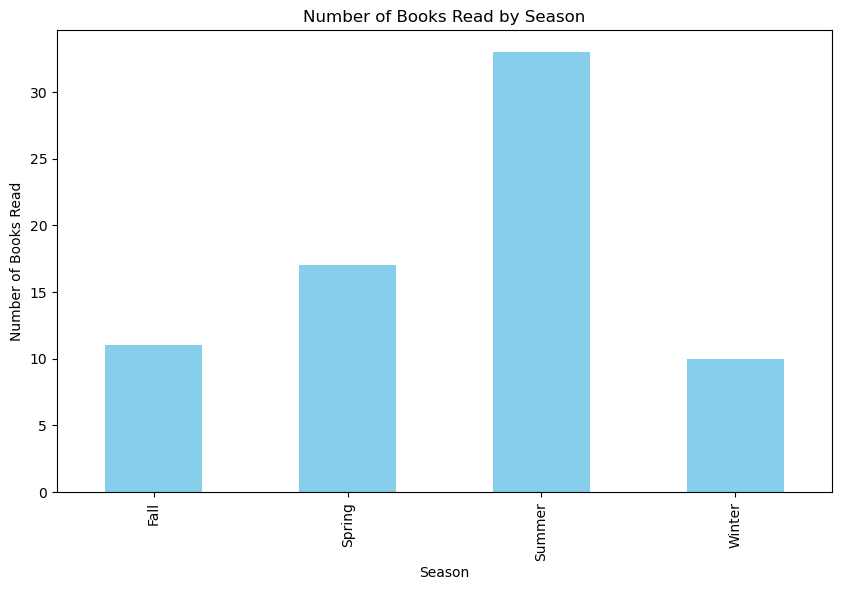

In [70]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
seasonal_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Books Read by Season')
plt.xlabel('Season')
plt.ylabel('Number of Books Read')
plt.show()

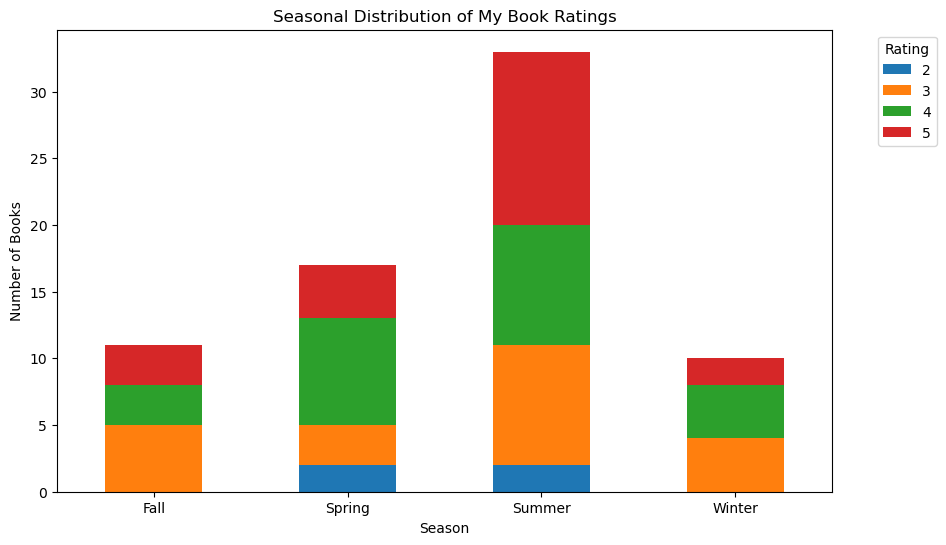

In [71]:
# Plotting the seasonal distribution of ratings
seasonal_rating_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Seasonal Distribution of My Book Ratings')
plt.xlabel('Season')
plt.ylabel('Number of Books')
plt.xticks(rotation=0)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1500x800 with 0 Axes>

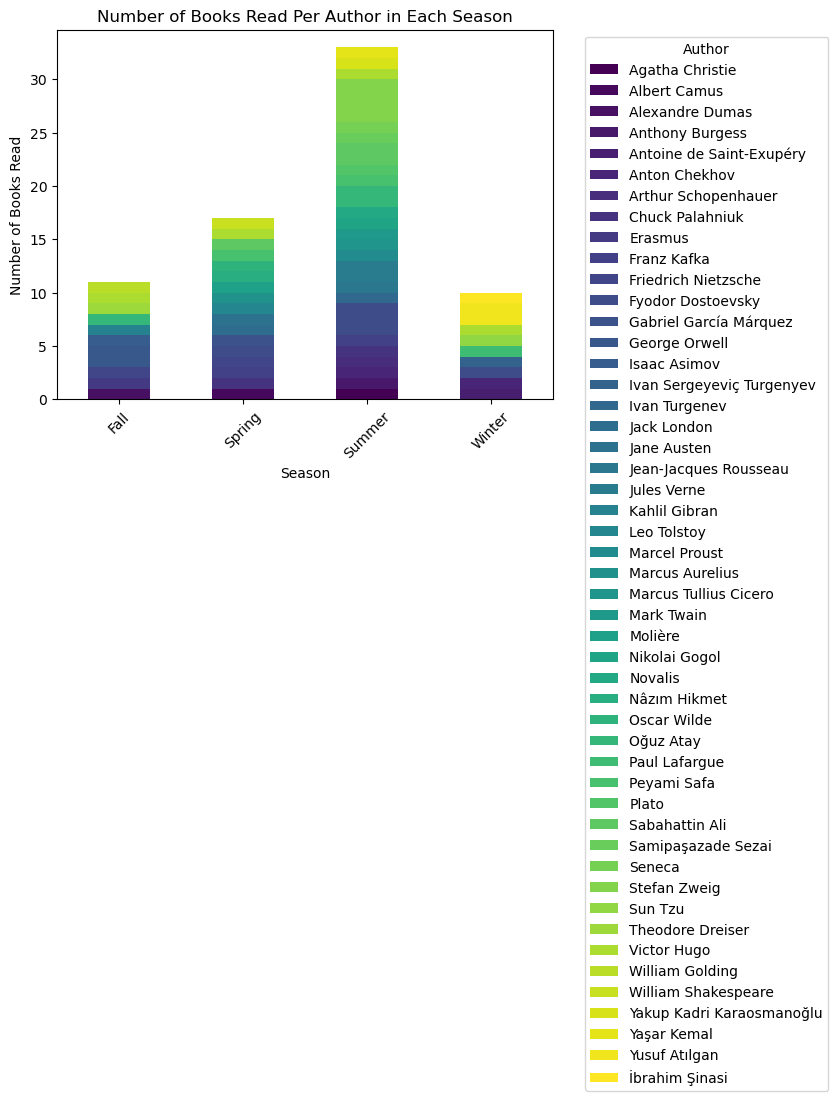

In [72]:
# Plot the results
plt.figure(figsize=(15, 8))
season_author_group.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Number of Books Read Per Author in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Books Read')
plt.legend(title='Author', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Descriptive Statistics for each Season:
        count      mean       std  min  25%  50%  75%  max
Season                                                    
Fall     11.0  3.818182  0.873863  3.0  3.0  4.0  4.5  5.0
Spring   17.0  3.823529  0.951006  2.0  3.0  4.0  4.0  5.0
Summer   33.0  4.000000  0.968246  2.0  3.0  4.0  5.0  5.0
Winter   10.0  3.800000  0.788811  3.0  3.0  4.0  4.0  5.0


/Users/defnekizilkaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/defnekizilkaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/defnekizilkaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


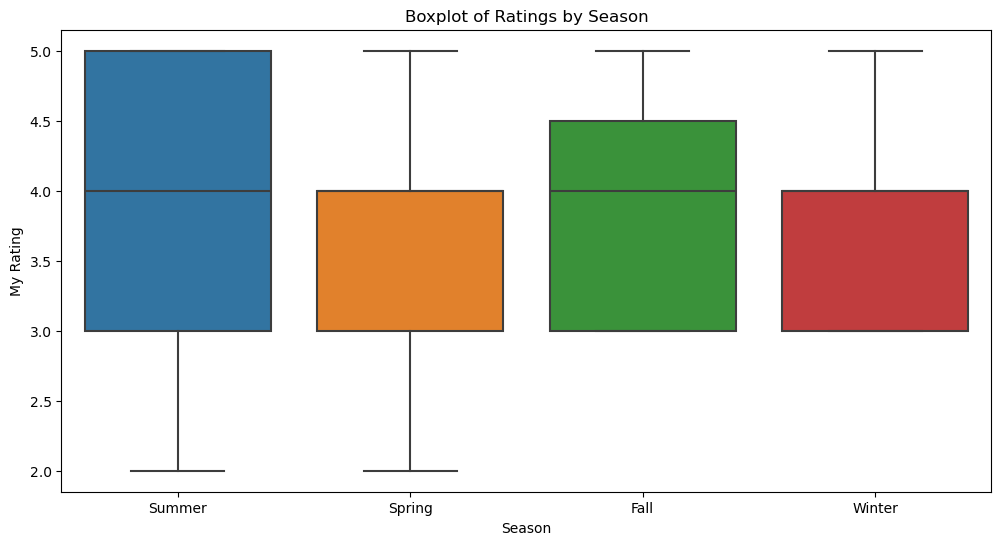

Normality test for Summer ratings: Statistics=0.8338834047317505, p-value=0.00015342635742854327
Normality test for Spring ratings: Statistics=0.8610906600952148, p-value=0.0159038994461298
Normality test for Fall ratings: Statistics=0.7848391532897949, p-value=0.005943898111581802
Normality test for Winter ratings: Statistics=0.819704532623291, p-value=0.025134451687335968
ANOVA test for comparing mean ratings across seasons: F-Statistic=0.23333288086937126, p-value=0.8728446296095647


In [73]:
from scipy import stats

# 1. Descriptive Statistics
descriptive_stats = data.groupby('Season')['My Rating'].describe()

# Display the descriptive statistics
print("Descriptive Statistics for each Season:")
print(descriptive_stats)

# 2. Distribution Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='My Rating', data=data)
plt.title('Boxplot of Ratings by Season')
plt.show()

# Checking for normality
for season in data['Season'].unique():
    season_data = data[data['Season'] == season]['My Rating']
    stat, p = stats.shapiro(season_data)
    print(f"Normality test for {season} ratings: Statistics={stat}, p-value={p}")

# 3. Seasonal Comparison
# ANOVA test to compare means across seasons (only appropriate if the assumptions are met)
f_stat, p_val = stats.f_oneway(data[data['Season'] == 'Winter']['My Rating'],
                               data[data['Season'] == 'Spring']['My Rating'],
                               data[data['Season'] == 'Summer']['My Rating'],
                               data[data['Season'] == 'Fall']['My Rating'])
print(f"ANOVA test for comparing mean ratings across seasons: F-Statistic={f_stat}, p-value={p_val}")



/var/folders/r6/8stpqbmn58j1ftm8zr8dsf9c0000gn/T/ipykernel_1030/3842007420.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  page_range_counts = data.groupby('Page Range')['Books Read'].sum()
/var/folders/r6/8stpqbmn58j1ftm8zr8dsf9c0000gn/T/ipykernel_1030/3842007420.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_page_range_counts = data.groupby(['Season', 'Page Range'])['Books Read'].sum().reset_index()


<Figure size 1200x800 with 0 Axes>

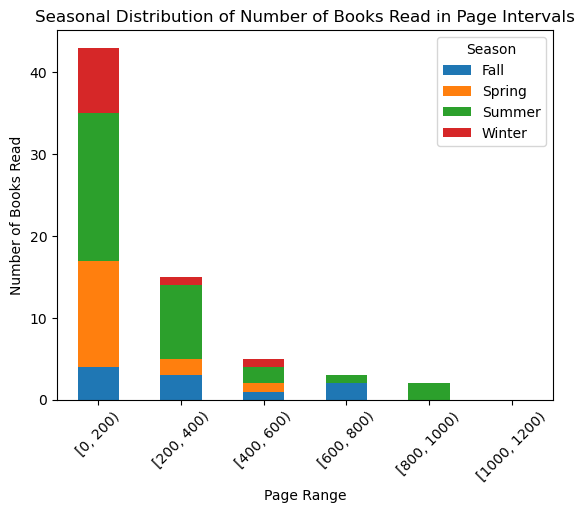

In [74]:
data['Books Read'] = 1

# Define intervals for the number of pages
bins = [0, 200, 400, 600, 800, 1000, 1200]

# Create a new column 'Page Range' representing the intervals
data['Page Range'] = pd.cut(data['Number of Pages'], bins=bins, right=False)

# Group by 'Page Range' and sum the number of books read
page_range_counts = data.groupby('Page Range')['Books Read'].sum()

# Create a DataFrame with 'Number of Pages' and 'Books Read'
midpoints = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]
page_interval_data = pd.DataFrame({
    'Number of Pages': midpoints,
    'Books Read': page_range_counts.values
})


# Group by 'Season' and 'Page Range', and sum the number of books read
seasonal_page_range_counts = data.groupby(['Season', 'Page Range'])['Books Read'].sum().reset_index()

# Pivot the table for better visualization
seasonal_page_range_pivot = seasonal_page_range_counts.pivot(index='Page Range', columns='Season', values='Books Read').fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
seasonal_page_range_pivot.plot(kind='bar', stacked=True)
plt.title('Seasonal Distribution of Number of Books Read in Page Intervals')
plt.xlabel('Page Range')
plt.ylabel('Number of Books Read')
plt.legend(title='Season')
plt.xticks(rotation=45)
plt.show()



# MACHINE LEARNING

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Extract the year and month from the 'Date Read' column
data['Year'] = data['Date Read'].dt.year
data['Month'] = data['Date Read'].dt.month

# Map months to seasons
season_mapping = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Fall', 10: 'Fall', 11: 'Fall'}
data['Season'] = data['Month'].map(season_mapping)

# Each row in DataFrame represents one book read
# Group by year and season, and count the number of books read
seasonal_counts = data.groupby(['Year', 'Season']).size().reset_index(name='Book Count')

# Pivot the DataFrame for modeling
seasonal_counts_pivot = seasonal_counts.pivot(index='Year', columns='Season', values='Book Count').fillna(0)

# Create models for each season
season_models = {}
season_predictions = {}
mse_conclusions = {}

for season in seasonal_counts_pivot.columns:
    X = seasonal_counts_pivot.index.values.reshape(-1, 1)  # Years
    y = seasonal_counts_pivot[season].values  # Book counts

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    season_models[season] = model

    # Calculate MSE
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_conclusions[season] = mse

    # Predict for a future year, e.g., 2025
    future_year = np.array([[2025]])
    predicted_books = model.predict(future_year)
    season_predictions[season] = int(round(predicted_books[0]))
    
    # Display Predicted books for each season in 2025, rounded to the nearest integer
print("\nPredicted books for each season in 2025 (rounded to nearest integer):")
for season, books in season_predictions.items():
    print(f"{season}: {books}")

# Display MSE for each season and derive conclusions
print("MSE for each season:")
for season, mse in mse_conclusions.items():
    print(f"{season}: {mse}")

    # Define a threshold for acceptable MSE based on data scale and requirements
    threshold = 10  # Example threshold, adjust based on your specific needs and data scale

    if mse < threshold:
        print(f"The model for {season} is performing well with a low MSE of {mse}.")
    else:
        print(f"The model for {season} needs improvement, as it has a high MSE of {mse}.")





Predicted books for each season in 2025 (rounded to nearest integer):
Fall: 4
Spring: 3
Summer: 4
Winter: 1
MSE for each season:
Fall: 0.6560000000000072
The model for Fall is performing well with a low MSE of 0.6560000000000072.
Spring: 7.754000000000005
The model for Spring is performing well with a low MSE of 7.754000000000005.
Summer: 3.874000000000003
The model for Summer is performing well with a low MSE of 3.874000000000003.
Winter: 1.8499999999999603
The model for Winter is performing well with a low MSE of 1.8499999999999603.


In [76]:
import pandas as pd
import scipy.stats as stats

# Convert 'Date Read' to datetime and extract the month
data['Date Read'] = pd.to_datetime(data['Date Read'], errors='coerce')
data['Year'] = data['Date Read'].dt.year
data['Month'] = data['Date Read'].dt.month

# Map months to seasons
season_mapping = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
}
data['Season'] = data['Month'].map(season_mapping)

# Group by year and season, then count the number of books
seasonal_book_counts = data.groupby(['Year', 'Season']).size().reset_index(name='Book Count')

# Prepare data for ANOVA test
# We need to ensure that we have multiple data points for each season
winter_books = seasonal_book_counts[seasonal_book_counts['Season'] == 'Winter']['Book Count']
spring_books = seasonal_book_counts[seasonal_book_counts['Season'] == 'Spring']['Book Count']
summer_books = seasonal_book_counts[seasonal_book_counts['Season'] == 'Summer']['Book Count']
fall_books = seasonal_book_counts[seasonal_book_counts['Season'] == 'Fall']['Book Count']

# Check if we have sufficient data for each season
if all(len(group) > 1 for group in [winter_books, spring_books, summer_books, fall_books]):
    # Perform one-way ANOVA test
    fvalue, pvalue = stats.f_oneway(winter_books, spring_books, summer_books, fall_books)
    print(f"F-Value: {fvalue}, P-Value: {pvalue}")
else:
    print("Not enough data in each season to perform ANOVA.")



F-Value: 5.543321889227768, P-Value: 0.005460981751195989
